In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pickle
from sklearn.manifold import TSNE
import umap
# import mplcursors

kdata = np.load('KeplerSampleFullQ.npy',encoding='bytes')

In [15]:
dmints = [-1.2,-0.3,-0.1,-0.05, -0.02,-0.01, -0.006, -0.005, -0.004, -0.0012, 
          -0.001, -0.0006, -0.0003, 0,  0.0003, 0.0006, 0.001, 0.0012, 0.003, 
          0.004, 0.005, 0.006, 0.01, 0.02, 0.05, 0.1, 0.3, 0.6, 1.2]
dtints = [-1.0/145, 1.0/47, 2.0/47, 3.0/47, 4.0/47, 6.0/47, 10.0/47, 15.0/47,
          20.0/47, 30.0/47, 40.0/47,   1.0,   1.2,  
           1.4,  1.5, 1.7,  2, 2.25,  2.5, 3.0, 4, 6 , 9, 15, 20, 30, 45, 60, 90]

def pairwisediffs(arrayoned):
    x = arrayoned.reshape((1,len(arrayoned)))
    xdm = x[:] - np.transpose(x[:])
    xd = xdm[np.triu_indices(len(x[0]), k = 1)]
    return(xd)
def get2dhist(lightcurve):
    xd = pairwisediffs(lightcurve[0])
    yd = pairwisediffs(lightcurve[1])
    H,xe,ye = np.histogram2d(xd,yd,bins=[dtints,dmints],range=None,normed=False)
    G = 255*H/np.sum(H)
    return G

def save_dmdt(n):
    fastdmdt = get2dhist([kdata[n][0],kdata[n][1]])
    np.save("dmdt_points/im_" + str(n), fastdmdt.T)
    return fastdmdt.T

In [16]:
data = []
for i, _ in enumerate(kdata):
    if i % 50 == 0:
        print "ON ITERATION " + str(i)
    temp = save_dmdt(i)
    data.append(temp)
    
data = np.array(data)
np.save("FINAL_DATA.npy", data)

ON ITERATION 0
ON ITERATION 50
ON ITERATION 100
ON ITERATION 150
ON ITERATION 200
ON ITERATION 250
ON ITERATION 300
ON ITERATION 350
ON ITERATION 400
ON ITERATION 450
ON ITERATION 500
ON ITERATION 550
ON ITERATION 600
ON ITERATION 650
ON ITERATION 700
ON ITERATION 750
ON ITERATION 800
ON ITERATION 850
ON ITERATION 900
ON ITERATION 950
ON ITERATION 1000
ON ITERATION 1050
ON ITERATION 1100
ON ITERATION 1150
ON ITERATION 1200
ON ITERATION 1250
ON ITERATION 1300
ON ITERATION 1350
ON ITERATION 1400
ON ITERATION 1450
ON ITERATION 1500
ON ITERATION 1550
ON ITERATION 1600
ON ITERATION 1650
ON ITERATION 1700
ON ITERATION 1750
ON ITERATION 1800
ON ITERATION 1850
ON ITERATION 1900
ON ITERATION 1950
ON ITERATION 2000
ON ITERATION 2050
ON ITERATION 2100
ON ITERATION 2150
ON ITERATION 2200
ON ITERATION 2250
ON ITERATION 2300
ON ITERATION 2350
ON ITERATION 2400
ON ITERATION 2450


In [17]:
temp = np.load("FINAL_DATA.npy")

In [18]:
temp.shape

(2500, 28, 28)

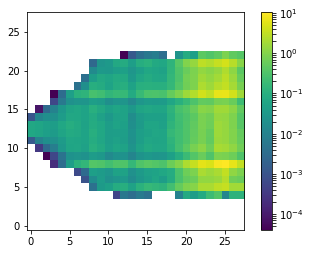

In [23]:
plt.imshow(temp[1250],  norm = LogNorm(), origin="lower")
plt.colorbar()